# readDiag

O pacote `readDiag` foi concebido para ser uma ferramenta que possibilita o fácil acesso aos arquivos diagnósticos gerados pelo [Gridpoint Statistical Interpolation (GSI) system](https://github.com/NOAA-EMC/GSI). O pacote é composto principalmente por 2 classes, a primeira para ler os dados (`read_diag`) e outra para fazer diferentes tipos de figuras com dados selecionados (`plot_diag`).

## A Classe `read_diag`

A classe read_diag é composta por 5 funções:

1. `__init__(self, diagFile, diagFileAnl=None, isisList=None, zlevs=None)`: sendo `diagFile` o arquivo de diagnóstico do primeiro outer loop com informação do OmF e `diagFileAnl` do último outer loop com informação do OmA. Note que não é necessário informar os dois arquivos, o `diagFileAnl` é opcional. Neste caso, a informação lida (Omf ou OmA) dependerá do outer loop (arquivo diagnóstico) fornecido;
2. `overview(self)`: esta função cria e retorna um dicionário com as informações existentes no arquivo;
3. `pfileinfo(self)`: esta função imprime de forma elegante uma lista com as informações existentes no arquivo;
4. `close(self)`: esta função fecha o último arquivo aberto;
5. `tocsv(self, varName=None, varType=None, dateIni=None, dateFin=None, nHour="06", Level=None, Lay=None, SingleL=None)`: esta função gera um arquivo CSV dos parâmetros OmF e OmA com as seguintes informações: data, média, desvio-padrão e total de dados para a variável e tipo escolhidos.
    
Os dados de entrada da função e funcionalidades são idênticas àquelas da função `time_series` que é apresentada na próxima seção na classe `plot_diag` (item 7 - ver também detalhes das funcionalidades [aqui](#time_series)). O que distingue as duas funções é que esta escreve um arquivo CSV e a outra gera figuras de séries temporais.

## A Classe `plot_diag`
    
A classe plot_diag é composta por 7 funções:

1. `plot(self, varName, varType, param, mask=None, **kwargs)`: a função `plot` gera uma figura para a variável `varName` (ex: `uv`), `varType` (ex: `220` (dropssonda)) e `param`, que pode ser várias opções como: `param="obs"` para o valor da observação, `param="omf"` para observação menos background ou `param="oma"` para observação menos análise. Também é possível mascarar os dados com a variável `iuse`, que indica se o dado foi (`iuse=1`) ou não (`iuse=-1` - dado monitorado) utilizado na assimilação. Abaixo há um exemplo executado para `varName="uv"`, `varType=220`, `param="obs"` e mask `iuse==1"`;

<img src=notefigs/uv_obs_plot.png style="width: 800px;">
<br>
    
2. `ptmap(self, varName, varType=None, mask=None, **kwargs)`: a função `ptmap` gera uma figura com a localização de todas as observações definidas por `varName` (ex: `uv`) e `varType` (pode ser um único tipo ou uma lista, ex: `[200]` ou `[220,221,257]`. Se `varType` não for informado, então todos os tipos serão incluídos na figura. Também é possível mascarar os dados com a variável `iuse`, que indica se o dado foi (`iuse=1`) ou não (`iuse=-1` - dado monitorado) utilizado na assimilação. Abaixo há um exemplo executado para `varName="uv"`, `varType=[254,242,221,220,257,258,281,280]` e `mask=None`; 

<img src=notefigs/uv_254_242_221_220_257_258_281_280_ptmap.png style="width: 800px;">
<br>

3. `pvmap(self, varName=None, mask=None, **kwargs)`: a função `pvmap` é similar à função `ptmap`, com a diferença de não especificar o tipo (`varType`), podendo então escolher uma lista de variáveis, ex: `["uv","ps","t"]`. Abaixo há um exemplo executado para `varName=['uv','ps','t']`, e `mask=None`; 

<img src=notefigs/uv_ps_t_pvmap.png style="width: 800px;">
<br>

4. `pcount(self,varName,**kwargs)`: a função `pcount` gera um histograma da quantidade de dados para uma determinada variável `varName` (ex: `uv`) e todos os tipos disponíveis (`varType`);

<img src=notefigs/uv_pcount.png style="width: 800px;">
<br>

5. `kxcount(self,**kwargs)`: a função `kxcount` é similar à `pcount`, porém não especifica a variável (`varName`). Esta função gera um histograma com o total de dados (todas as variáveis somadas) para todos os tipos disponíveis (`varType`);

<img src=notefigs/kxcount.png style="width: 800px;">
<br>

6. `vcount(self,**kwargs)`: a função `vcount` gera um histograma com a quantidade total de dados para cada variável (`ps`, `t`, `q`, `uv`);

<img src=notefigs/vcount.png style="width: 800px;">
<br>

7. `time_series(self, varName=None, varType=None, dateIni=None, dateFin=None, nHour="06", vminOMA=None, vmaxOMA=None, vminSTD=0.0, vmaxSTD=14.0, Level=None, Lay=None, SingleL=None, Clean=None)`: a função `time_series` pode gerar 6 tipos distintos de figuras, dependendo da configuração especificada na sua chamada. A característica comum entre os 6 tipos é a variação no tempo, enquanto que a diferença entre os 6 tipos é a forma de tratar os níveis verticais. Basicamente estas formas são distribuídas entre variar na vertical (diferentes valores para diferentes níveis/camadas) e fixo na vertical (nível específico, média na camada ou toda a atmosfera). 

A seguir são apresentados os parâmetros de entrada na função e cada uma das opções de figuras será explicada em mais detalhes.
    
| Parâmetro       | Exemplo                                  | Descrição
| :---            | :---:                                    | :---
| `self`          | `['/home/user/diag_conv_01.2019121000']` | Lista com todos os caminhos completos (`caminho/nome_do_arquivo`) de cada tempo da série temporal.             
| `varName`       | `uv`                                     | Nome da variável   
| `varType`       | `220`                                    | Tipo da variável
| `dateIni`       | `2019121000`                             | Data inicial da série temporal
| `dateFin`       | `2019121118`                             | Data final da série temporal
| `nHour`         | `6`                                      | Intervalo de tempo em horas entre cada arquivo na lista `self`
| `vminOMA`       | `-2.0`                                   | Valor mínimo da escala y (ordenada) para OmF e OmA
| `vmaxOMA`       | `2.0`                                    | Valor máximo da escala y (ordenada) para OmF e OmA
| `vminSTD`       | `0.0`                                    | Valor mínimo da escala y (ordenada) para o desvio-padrão
| `vmaxSTD`       | `14.0`                                   | Valor máximo da escala y (ordenada) para o desvio-padrão
| `Level`         | `Zlevs`                                  | Valor do nível a ser feita a série temporal, opções: valor numérico referente ao nível, ex.: 1000 p/ 1000 hPa; `Zlevs` para plotar por camadas (em torno dos níveis padrão); `None` para plotar de todos os níveis.
| `Lay`           | 25                                       | Metade do tamanho da camada (se `Level="Zlevs"`) em hPa se optar por amostragem em camadas. Se `Lay=None`, `Lay` será calculada internamente para preencher toda a atmosfera contendo os níveis padrão.
| `SingleL`       | `All`                                    | Quando `Level` for fixo, ex: 1000 hPa, será considerado exatamente esse nível (usando a opção `SingleL=None`) ou em todos os níveis como uma única camada (usando `SingleL="All"`) ou em uma camada definida em torno do valor de `Level` variando entre `Level-Lay` e `Level+Lay`. Se `Lay` não for informado, será usado um valor padrão de 50 hPa.
| `Clean`         | `True` ou `False`                        | Se `True`, após gerar e salvar a figura, a janela da figura é reiniciada (`plt.clf()`) ou fechada (`plt.close()`), se `False`, este procedimento é eliminado e a figura continua disponível para visualização com `plt.show()`.

Todas as figuras geradas com a opção `Level` igual a `None` ou `Zlevs` conterá no nome o termo `all_levels`, caso contrário será `level` ou `layer`, dependendo da opção `SingleL`.

No decorrer deste notebook são mostrados exemplos com recortes de código para exemplificar o uso das funções acima elencadas.

## Utilização da classe `read_diag`

### Bibliotecas necessárias

Para iniciar a utilização do `readDiag`, carregue primeiro as bibliotecas necessárias para a sua utilização:

* `gsidiag`: é a biblioteca que contém as classes `read_diag` e `plot_diag`;
* `pandas`: é a biblioteca que fornece as estruturas de dados tabulados utilizadas pelo `readDiag`;
* `matplotlib`: é a biblioteca a partir da qual são confeccionadas as figuras;
* `datetime`: é a biblioteca utilizada para manipular datas.

A instrução `%matplotlib inline` é um comando mágico do Jupyter e apenas ajusta o ambiente para que não seja necessário utilizar o comando `plt.show()` sempre que figuras forem mostradas dentro do notebook. Se você estiver utilizando o `readDiag` dentro de um script Python, esta diretiva pode ser suprimida e o comando `plt.show()` deve ser utilizado, a depender da situação.

In [1]:
import gsidiag as gd

import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

%matplotlib inline

### Variáveis principais

Na tabela a seguir, estão relacionadas os valores padrão das variáveis utilizadas ao longo deste tutorial. Observe que as variáveis possuem diferentes tipos e que algumas podem ser declaradas como `None`.

| Variáveis |     | Valores          | Tipo              |
| :---:     |:---:| :---             | :---              |
| `DIRdiag` | =   | `/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout` | string |
|`varName`  | =   | `uv`             | string            |  
|`varType`  | =   | `220`            | integer           |        
|`dateIni`  | =   | `2019121000`     | string            |
|`dateFin`  | =   | `2019121118`     | string            |
|`nHour`    | =   | `6`              | string            | 
|`vminOMA`  | =   | `-2.0`           | float             |
|`vmaxOMA`  | =   | `2.0`            | float             |
|`vminSTD`  | =   | `0.0`            | float             |
|`vmaxSTD`  | =   | `14.0`           | float             |
|`Level`    | =   | `1000`           | integer ou `None` |
|`Lay`      | =   | `15`             | integer ou `None` |
|`SingleL`  | =   | `OneL`           | string            |
                          
Dessa forma, na célula a seguir são ajustadas as variáveis seguindo os valores da tabela acima. Além disso, são ajustados também os valores das datas para compor o caminho e os nomes dos arquivos de diagnóstico do GSI:

In [2]:
# Para uso na Egeon
#DIRdiag = "/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# Para uso na Itapemirim (Colorado, Ilopolis e outras máquinas virtuais)
#DIRdiag = "/share/das/dist/joao.gerd/EXP18/GSI/dataout"

# Para uso em máquina local (neste caso, o diretório remoto deverá ser montado localmente com o comando sshfs)
# Exemplo: 
# $ sshfs username@egeon.cptec.inpe.br:/pesq/share/das/dist/joao.gerd/EXP18/GSI/dataout /extra2/EGEON_EXP18_GSI_dataout
# ou
# $ sshfs username@itapemirim.cptec.inpe.br:/share/das/dist/joao.gerd/EXP18/GSI/dataout /extra2/EGEON_EXP18_GSI_dataout
# DIRdiag = '/home/radiancia/Versoes-readDiag/readDiag-Old/data'
# DIRdiag = '/home/radiancia/Exp_SMNA/EXP20/gsi/dataout'
DIRdiag = '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout'

varName = 'uv' #'amsua' #'uv'
varType = 220  #'n15'   #220
dateIni = '2024032600' 
dateFin = '2024032618' 
nHour = '6'          
vminOMA = -2.0       
vmaxOMA = 2.0        
vminSTD = 0.0        
vmaxSTD = 14.0       
Level = 1000
Lay = 15           
SingleL = 'OneL' 

datei = datetime.strptime(str(dateIni), '%Y%m%d%H')
datef = datetime.strptime(str(dateFin), '%Y%m%d%H')
dates = [dates.strftime('%Y%m%d%H') for dates in pd.date_range(datei, datef,freq='6H').tolist()]

print(dates)

['2024032600', '2024032606', '2024032612', '2024032618']


Gerando as variáveis `path` e `pathc` onde estarão os caminhos completos (incluindo nome do arquivo) dos arquivos diagnósticos do primeiro (OmF) e último (OmA) outer loop:

In [3]:
paths, pathsc = [], []

OuterL = '01'        
[paths.append(DIRdiag + '/' + dt + '/diag_conv_' + OuterL + '.' + dt) for dt in dates]

OuterLc = '03'
[pathsc.append(DIRdiag + '/' + dt + '/diag_conv_' + OuterLc + '.' + dt) for dt in dates]

# OuterL = '01'        
# [paths.append(DIRdiag + '/' + dt + '/diag_amsua_n15_' + OuterL + '.' + dt) for dt in dates]

# OuterLc = '03'
# [pathsc.append(DIRdiag + '/' + dt + '/diag_amsua_n15_' + OuterLc + '.' + dt) for dt in dates]

print(paths)
print('')
print(pathsc)

['/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032600/diag_conv_01.2024032600', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032606/diag_conv_01.2024032606', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032612/diag_conv_01.2024032612', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032618/diag_conv_01.2024032618']

['/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032600/diag_conv_03.2024032600', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032606/diag_conv_03.2024032606', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032612/diag_conv_03.2024032612', '/home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032618/diag_conv_03.2024032618']


### Leitura dos arquivos de diagnósticos

**Nota:** a leitura dos arquivos de diagnóstico seguindo os valores ajustados para os parâmetros acima, requer pelo menos 8GB de memória RAM. Caso seja necessário, ajuste os parâmetros para considerar um intervalo menor.

Lendo os arquivos diagnósticos com a função `read_diag()` do pacote `readDiag`. No trecho de código a seguir, observe que a função `read_diag()` é utilizada dentro de um loop que varia sobre todos os arquivos das listas `paths` e `pathsc` definidas no passo anterior. No final do loop, é gerada a lista `gdf_list` que conterá todos os arquivos lidos pelo `readDiag`:

In [4]:
read = True

if read:        
    gdf_list = []
    print('')
    
    print('Aguarde, o tempo total estimado para a leitura dos arquivos é de ' +
          str(int((float(len(paths))*20)/60)) + ' minutos e ' +
          str(int((float(len(paths))*20)%60)) + ' segundos.')
    
    print('')
    
    for path, pathc in zip(paths, pathsc):
        print('Reading ' + path)
        
        gdf = gd.read_diag(path, pathc)
        
        gdf_list.append(gdf)
        
    print('Pronto!')    


Aguarde, o tempo total estimado para a leitura dos arquivos é de 1 minutos e 20 segundos.

Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032600/diag_conv_01.2024032600
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032606/diag_conv_01.2024032606
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032612/diag_conv_01.2024032612
 
>>> GSI DIAG <<<
 
Reading /home/radiancia/Exp_SMNA/data/EXP19/gsi_dataout/2024032618/diag_conv_01.2024032618
 
>>> GSI DIAG <<<
 
Pronto!


A variável `gdf_list` é uma lista de dataframes contendo os dados de cada arquivo diagnóstico. Para trabalhar com um único tempo basta informar a lista com o índice fixo, por exemplo: `gdf_list[0]`:

In [5]:
gdf_list

Fazendo `tidx = 0`, obtemos o primeiro objeto da lista `gdf_list`:

In [6]:
tidx = 0
gdf_list[tidx]

### Obtendo informações dos arquivos

Utilize a função `pfileinfo()` para obter uma lista das observações e seus respectivos tipos (`kx`) que estão contidos dentro do arquivo:

In [7]:
gdf_list[tidx].pfileinfo()

Variable Name : ps
              └── kx => 120  181  180  187  183  

Variable Name : t
              └── kx => 120  181  187  180  183  130  126  

Variable Name : q
              └── kx => 120  181  187  180  183  

Variable Name : uv
              └── kx => 244  220  281  287  280  221  284  230  210  252  242  250  282  224  

Variable Name : gps
              └── kx => 3  42  269  5  753  750  751  752  754  755  43  825  44  



Além do método `pfileinfo()`, outros métodos e funções também podem ser utilizados para acessar as informações sobre os arquivos abertos. Para obter uma lista dos métodos e funções disponíveis, digite `gdf_list[tidx].` e pressione a tecla `<TAB>` duas vezes no teclado:

```python
>>> gdf_list[tidx].
gdf_list[tidx].close(      gdf_list[tidx].obsInfo     gdf_list[tidx].pfileinfo(  gdf_list[tidx].zlevs       
gdf_list[tidx].tocsv(      gdf_list[tidx].overview(   gdf_list[tidx].varNames    
gdf_list[tidx].obs
```

Os métodos e funções embutidas possuem documentação, as quais podem ser acessadas da seguinte forma:

```python
print(object.function_name.__doc__)
```

ou

```python
help(object.function_name)
```

Por exemplo:

In [8]:
print(gdf_list[tidx].pfileinfo.__doc__)

print ('>>>>>>>>> print(gdf_list[tidx].obs)')
print(gdf_list[tidx].obs)

print ('>>>>>>>>> print(gdf_list[tidx].obsInfo)')
print(gdf_list[tidx].obsInfo)

print ('>>>>>>>>> print(gdf_list[tidx].varNames)')
print(gdf_list[tidx].varNames)

print ('>>>>>>>>> print(gdf_list[tidx].zlevs)')
print(gdf_list[tidx].zlevs)


        Prints a fancy list of the existing variables and types.

        Usage: pfileinfo()
        
>>>>>>>>> print(gdf_list[tidx].obs)
               lat         lon   elev     prs      hgt   press        time  \
    kx                                                                       
ps  120 -70.769997   11.830000  119.0   969.0    119.0   900.0  -33.000000   
    120 -28.410000   21.260000  849.0   923.0    849.0   900.0  -25.199999   
    120 -33.980000   18.600000   52.0  1014.0     52.0  1000.0  -45.000000   
    120   0.470000    9.420000   12.0  1010.0     12.0  1000.0  -42.000000   
    120  -4.820000   11.900000   17.0  1009.0     17.0  1000.0  -79.800003   
...            ...         ...    ...     ...      ...     ...         ...   
gps 44  -73.636887  353.435181    0.0     0.0  59019.0     0.0 -164.000000   
    44  -73.638023  353.436462    0.0     0.0  59213.5     0.0 -164.000000   
    44  -73.639137  353.437775    0.0     0.0  59407.5     0.0 -164.000000   
   

ou ainda:

In [9]:
help(gdf_list[tidx].pfileinfo)

Help on method pfileinfo in module gsidiag.__main__:

pfileinfo() method of gsidiag.__main__.read_diag instance
    Prints a fancy list of the existing variables and types.
    
    Usage: pfileinfo()



Para obter um dicionário com todas as informações sobre as variáveis e tipos contidos no arquivo, utilize o método `obsInfo`:

In [10]:
gdf_list[tidx].obsInfo

{'ps':                   lat         lon   elev          prs    hgt   press  \
 kx  points                                                             
 120 0      -70.769997   11.830000  119.0   969.000000  119.0   900.0   
     1      -28.410000   21.260000  849.0   923.000000  849.0   900.0   
     2      -33.980000   18.600000   52.0  1014.000000   52.0  1000.0   
     3        0.470000    9.420000   12.0  1010.000000   12.0  1000.0   
     4       -4.820000   11.900000   17.0  1009.000000   17.0  1000.0   
 ...               ...         ...    ...          ...    ...     ...   
 183 3666    64.453003  338.596985  501.0   947.900024  501.0   900.0   
     3667    63.980000  338.343994  530.0   943.299988  530.0   900.0   
     3668    66.029999  343.516998   38.0  1009.099976   38.0  1000.0   
     3669    65.183998  339.214996  130.0   995.799988  130.0   900.0   
     3670    64.195999  340.953003  542.0   943.799988  542.0   900.0   
 
                   time  idqc  iuse  iusev 

Para acessar uma variável específica (ex: `uv`), faça:

In [11]:
print('Variável: ', varName)

gdf_list[tidx].obsInfo[varName]

Variável:  uv


lat         lon     elev         prs     hgt  press  \
kx  points                                                              
244 0      -68.339996    7.670000  80082.0  425.000000    35.0  400.0   
    1      -67.260002   18.620001  89098.0  250.000000   110.0  250.0   
    2      -68.910004    8.410000  67063.0  475.000000    41.0  400.0   
    3      -67.879997   19.280001  89098.0  250.000000   110.0  250.0   
    4      -70.239998   12.940000  66063.0  775.000000    52.0  700.0   
...               ...         ...      ...         ...     ...    ...   
224 22113   43.889999  289.739990    140.0  828.852905  1765.0  800.0   
    22114   43.889999  289.739990    140.0  798.720215  2065.0  700.0   
    22115   43.889999  289.739990    140.0  714.530212  2965.0  700.0   
    22116   43.889999  289.739990    140.0  688.262695  3265.0  600.0   
    22117   43.889999  289.739990    140.0  662.797546  3565.0  600.0   

                  time  idqc  iuse  iusev  ...   inp_err   adj_err  \
kx  points                                 ...                       
244 0      -152.000000   2.0  -1.0    0.0  ...  0.181818  0.181818   
    1      -152.000000   2.0   1.0    0.0  ...  0.142857  0.142857   
    2      -152.000000   2.0   1.0    0.0  ...  0.219780  0.219780   
    3      -152.000000   2.0   1.0    0.0  ...  0.142857  0.142857   
    4      -152.000000   2.0   1.0    0.0  ...  0.263158  0.263158   
...                ...   ...   ...    ...  ...       ...       ...   
224 22113  -169.999802   2.0   1.0    0.0  ...  0.666667  0.366331   
    22114  -169.999802   3.0   1.0    0.0  ...  0.625000  0.290404   
    22115  -169.999802   2.0   1.0    0.0  ...  0.625000  0.332276   
    22116  -169.999802   2.0   1.0    0.0  ...  0.625000  0.326753   
    22117  -169.999802   3.0   1.0    0.0  ...  0.588235  0.246752   

                  inverr       oer        obs        omf       oma        imp  \
kx  points                                                                      
244 0       2.938736e-39  5.500000 -11.949829  -8.205175 -5.980575  -5.737751   
    1       1.017976e-01  9.823410  59.772999  10.430898  7.127079  -5.905115   
    2       2.197802e-01  4.550000  -8.009268  -2.904497 -1.091460  -1.592268   
    3       1.428571e-01  7.000000  59.451588   7.161664  3.935468  -5.114502   
    4       2.631579e-01  3.800000 -15.390618  -3.802110 -2.633624  -1.978964   
...                  ...       ...        ...        ...       ...        ...   
224 22113   3.663311e-01  2.729771  -2.316667   5.945249  2.275834 -11.050953   
    22114   2.904045e-01  3.443473  -2.033333   6.760222  2.646605 -11.237516   
    22115   3.322760e-01  3.009547  -5.000000   0.302438 -3.012157   2.984378   
    22116   3.267530e-01  3.060416  -6.316667  -1.754226 -4.317970   5.086745   
    22117   2.467516e-01  4.052658  -7.483333  -3.829326 -6.061653   5.448251   

                 dfs                    geometry  
kx  points                                        
244 0      -3.318770   POINT (7.67000 -68.34000)  
    1      -3.508129  POINT (18.62000 -67.26000)  
    2      -1.157354   POINT (8.41000 -68.91000)  
    3      -3.300704  POINT (19.28000 -67.88000)  
    4      -1.169134  POINT (12.94000 -70.24000)  
...              ...                         ...  
224 22113  -7.991730  POINT (-70.26001 43.89000)  
    22114  -8.075848  POINT (-70.26001 43.89000)  
    22115  -0.333093  POINT (-70.26001 43.89000)  
    22116   1.469534  POINT (-70.26001 43.89000)  
    22117   2.109309  POINT (-70.26001 43.89000)  

[210779 rows x 21 columns]

Para acessar variável e tipo específicos (ex: `uv` do tipo `220`), faça:

In [12]:
print('Variável: ', varName, ' e Tipo: ', varType)
tidx = 0
gdf_list[tidx].obsInfo[varName].loc[varType]

Variável:  uv  e Tipo:  220


,lat,lon,elev,prs,hgt,press,time,idqc,iuse,iusev,...,inp_err,adj_err,inverr,oer,obs,omf,oma,imp,dfs,geometry
points,,,,,,,,,,,,,,,,,,,,,
0,-70.769997,11.830000,119.0,969.0,1.000000e+11,900.0,-33.000000,2.0,1.0,0.0,...,0.666667,0.519871,0.030987,32.787987,-3.0,8.255296,6.674501,-0.719805,-0.398009,POINT (11.83000 -70.77000)
1,-70.769318,11.828980,119.0,965.0,1.000000e+11,900.0,-32.893200,2.0,1.0,0.0,...,0.666667,0.519867,0.034110,29.832287,-8.6,2.661286,1.079816,-0.198323,-0.141080,POINT (11.82898 -70.76932)
2,-70.765190,11.815520,119.0,936.0,1.000000e+11,900.0,-32.094002,2.0,1.0,0.0,...,0.666667,0.595203,0.135770,7.878797,-12.0,-0.694946,-2.281757,0.599516,0.139964,POINT (11.81552 -70.76519)
3,-70.763977,11.809170,119.0,925.0,1.000000e+11,900.0,-31.767000,2.0,1.0,0.0,...,0.666667,0.595188,0.595188,1.680140,-11.6,3.621988,0.950250,-7.270714,-5.759638,POINT (11.80917 -70.76398)
4,-70.758133,11.766910,119.0,850.0,1.000000e+11,800.0,-29.576401,2.0,1.0,0.0,...,0.666667,0.664683,0.664683,1.504477,-12.0,4.646196,3.855658,-4.467359,-2.441377,POINT (11.76691 -70.75813)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46349,70.930000,351.329987,9.0,50.0,1.000000e+11,50.0,18.503399,2.0,1.0,0.0,...,0.476190,0.476190,0.476190,2.100000,-1.6,-0.078393,-0.045003,-0.001962,-0.001246,POINT (-8.67004 70.93000)
46350,70.930000,351.329987,9.0,30.0,1.000000e+11,0.0,29.436600,2.0,1.0,0.0,...,0.476190,0.396825,0.396825,2.520000,-5.4,-0.548320,-0.752948,0.105665,0.044525,POINT (-8.67004 70.93000)
46351,70.930000,351.329987,9.0,20.0,1.000000e+11,0.0,37.969803,2.0,1.0,0.0,...,0.476190,0.396825,0.396825,2.520000,-6.5,5.544775,4.733024,-3.310721,-1.786103,POINT (-8.67004 70.93000)


O parâmetro `varType` pode ser também uma lista, ex: `varType=[220,221]`:

In [13]:
varTypes = [220,221]

print('Variável: ', varName, ' e Tipos: ', varTypes)

gdf_list[tidx].obsInfo[varName].loc[varTypes]

Variável:  uv  e Tipos:  [220, 221]


lat         lon   elev         prs           hgt  press  \
kx  points                                                                  
220 0      -70.769997   11.830000  119.0  969.000000  1.000000e+11  900.0   
    1      -70.769318   11.828980  119.0  965.000000  1.000000e+11  900.0   
    2      -70.765190   11.815520  119.0  936.000000  1.000000e+11  900.0   
    3      -70.763977   11.809170  119.0  925.000000  1.000000e+11  900.0   
    4      -70.758133   11.766910  119.0  850.000000  1.000000e+11  800.0   
...               ...         ...    ...         ...           ...    ...   
221 806     11.305220  355.773682  460.0  150.000000  1.000000e+11  150.0   
    807     11.329180  355.798462  460.0  140.149567  1.470000e+04  100.0   
    808     11.349310  355.824585  460.0  120.185188  1.560000e+04  100.0   
    809     11.356790  355.833618  460.0  114.083572  1.590000e+04  100.0   
    810     11.362880  355.842529  460.0  100.000000  1.000000e+11  100.0   

                 time  idqc  iuse  iusev  ...   inp_err   adj_err    inverr  \
kx  points                                ...                                 
220 0      -33.000000   2.0   1.0    0.0  ...  0.666667  0.519871  0.030987   
    1      -32.893200   2.0   1.0    0.0  ...  0.666667  0.519867  0.034110   
    2      -32.094002   2.0   1.0    0.0  ...  0.666667  0.595203  0.135770   
    3      -31.767000   2.0   1.0    0.0  ...  0.666667  0.595188  0.595188   
    4      -29.576401   2.0   1.0    0.0  ...  0.666667  0.664683  0.664683   
...               ...   ...   ...    ...  ...       ...       ...       ...   
221 806     -1.171800   2.0   1.0    0.0  ...  0.416667  0.334986  0.334986   
    807      2.466600   2.0   1.0    0.0  ...  0.434783  0.434783  0.434783   
    808      5.466600   2.0   1.0    0.0  ...  0.454545  0.424421  0.424421   
    809      6.466800   2.0   1.0    0.0  ...  0.476190  0.407998  0.407998   
    810      7.399200   2.0   1.0    0.0  ...  0.476190  0.441497  0.441497   

                  oer        obs       omf       oma       imp       dfs  \
kx  points                                                                 
220 0       32.787987  -3.000000  8.255296  6.674501 -0.719805 -0.398009   
    1       29.832287  -8.600000  2.661286  1.079816 -0.198323 -0.141080   
    2        7.878797 -12.000000 -0.694946 -2.281757  0.599516  0.139964   
    3        1.680140 -11.600000  3.621988  0.950250 -7.270714 -5.759638   
    4        1.504477 -12.000000  4.646196  3.855658 -4.467359 -2.441377   
...               ...        ...       ...       ...       ...       ...   
221 806      2.985203   8.800000 -4.248921 -4.658696  1.222736  0.583244   
    807      2.300000  16.000000  1.989379  1.984134 -0.009061 -0.004537   
    808      2.356154  15.600000  0.946813  0.884834 -0.048182 -0.024906   
    809      2.450993  17.299999  2.427119  2.221065 -0.390771 -0.204047   
    810      2.265023  17.299999  5.129205  4.174620 -3.921057 -2.161682   

                              geometry  
kx  points                              
220 0       POINT (11.83000 -70.77000)  
    1       POINT (11.82898 -70.76932)  
    2       POINT (11.81552 -70.76519)  
    3       POINT (11.80917 -70.76398)  
    4       POINT (11.76691 -70.75813)  
...                                ...  
221 806      POINT (-4.22632 11.30522)  
    807      POINT (-4.20154 11.32918)  
    808      POINT (-4.17542 11.34931)  
    809      POINT (-4.16638 11.35679)  
    810      POINT (-4.15747 11.36288)  

[47165 rows x 21 columns]

Para acessar o valor da observação, utilize o método `obs`:

In [14]:
print('Variável: ', varName, ' e Tipo: ', varType)

gdf_list[tidx].obsInfo[varName].loc[varType].obs

# gdf_list[tidx].obsInfo[varName].loc[varType].idqc

Variável:  uv  e Tipo:  220


points
0        -3.0
1        -8.6
2       -12.0
3       -11.6
4       -12.0
         ... 
46349    -1.6
46350    -5.4
46351    -6.5
46352   -16.1
46353   -10.9
Name: obs, Length: 46354, dtype: float32

## Utilização da classe `plot_diag`

### Distribuição espacial

A utilização das funções da classe `plot_diag` é apresentada abaixo, junto com os comandos para gerar diversos tipos de figuras.

Gerando uma figura com os valores das observações (`param='obs'`) para a variável e tipo selecionados:

/home/radiancia/readDiag-issuefix_27/gsidiag/__main__.py:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


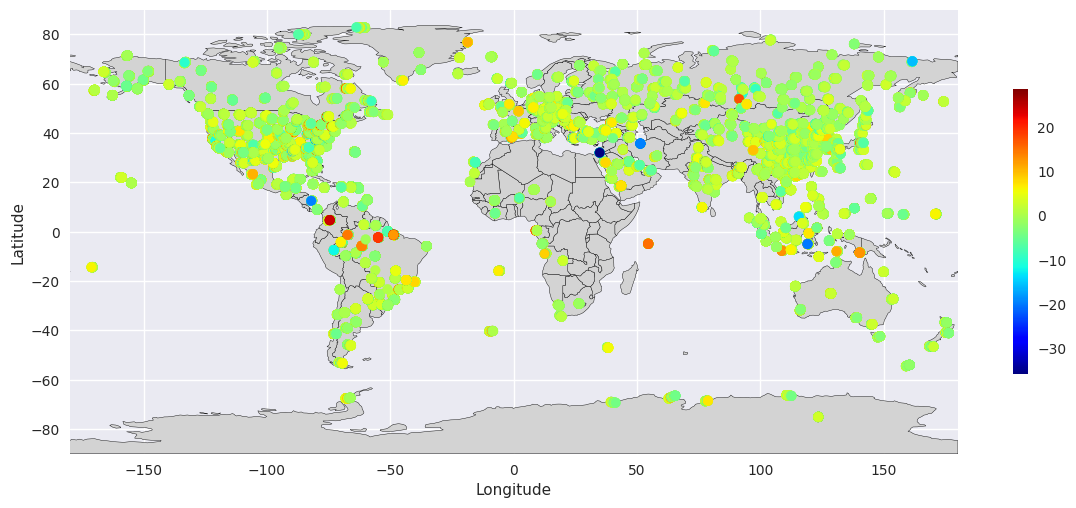

In [16]:
param = 'omf'
tidx = 2
mask = 'iuse == 1'

# df = gdf_list[tidx].obsInfo[varName].query(mask).loc[varType].omf

# df1 = gdf_list[tidx].obsInfo[varName].query(mask).loc[varType].idqc

# Range colors: param
# minVal = 150.0000
# maxVal = 300.0000

# minVal = df.min()
# maxVal = df.max()

# print('minVal=',minVal,'maxVal=',maxVal)

# if maxVal >= 1000.000:
#     maxVal = 30.000

# minVal = None
# maxVal = None

# print('param=', param, 'tidx=', tidx)

# gd.plot_diag.plot(gdf_list[tidx], 
#                   varName=varName, 
#                   varType=varType, 
#                   param=param, 
#                   minVal=minVal, 
#                   maxVal=maxVal, 
#                   mask='iuse == 1', 
#                   legend='true')


gd.plot_diag.plot(gdf_list[tidx], 
                  varName=varName, 
                  varType=varType, 
                  param=param,  
                  mask='iuse == 1', 
                  legend='true')


figname = varName + '_' + param + '_' + 'plot.png'

plt.tight_layout()
plt.savefig(figname)

Para salvar a figura, defina o seu nome (`figname`) e execute os comandos a seguir:

In [17]:
# figname = varName + '_' + param + '_' + 'plot.png'

# plt.tight_layout()
# plt.savefig(figname)

Gerando a mesma figura, mas considerando vários tipos diferentes (`kx`) da observação selecionada:

/home/radiancia/readDiag-issuefix_27/gsidiag/__main__.py:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


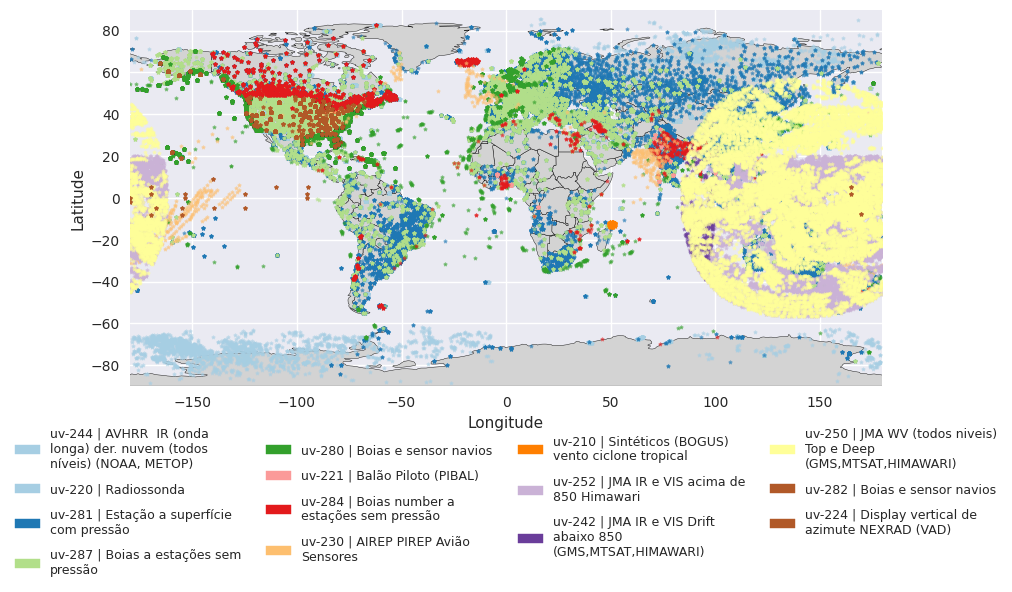

In [18]:
varTypes = [244,220,281,287,280,221,284,230,210,252,242,250,282,224] #244 220 281 287 280 221 284 230 210 252 242 250 282 224
idschar = '_'.join([str(item) for item in varTypes])

gd.plot_diag.ptmap(gdf_list[tidx], varName=varName, varType=varTypes)

figname = varName + '_' + idschar + '_' + 'ptmap.png'

plt.tight_layout()
plt.savefig(figname)

Gerando uma figura com diferentes variáveis, considerando a máscara `iuse==1`:

/home/radiancia/readDiag-issuefix_27/gsidiag/__main__.py:91: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  path=gpd.datasets.get_path('naturalearth_lowres')


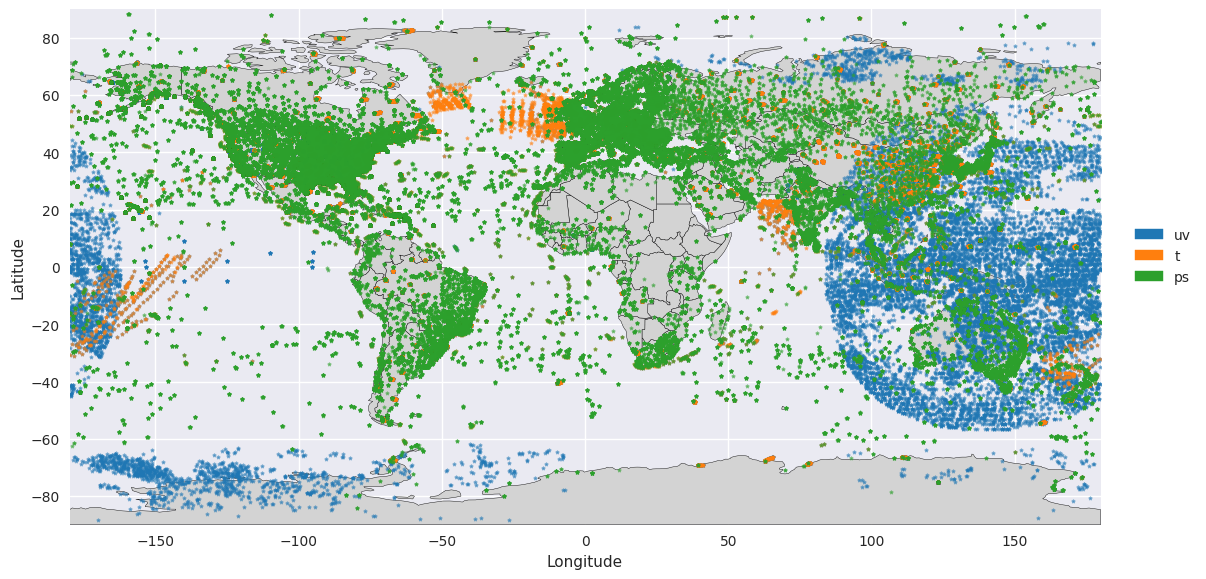

In [26]:
varNames = ['uv','ps','t']
idschar = '_'.join([str(item) for item in varNames])

gd.plot_diag.pvmap(gdf_list[tidx], varName=varNames, mask='iuse==1')

figname = idschar + '_pvmap.png'

plt.tight_layout()
plt.savefig(figname)

### Histograma

Utilize a função `pcount()` da classe `plot_diag` para obter um histograma com a contagem do número de observações para uma determinada variável:

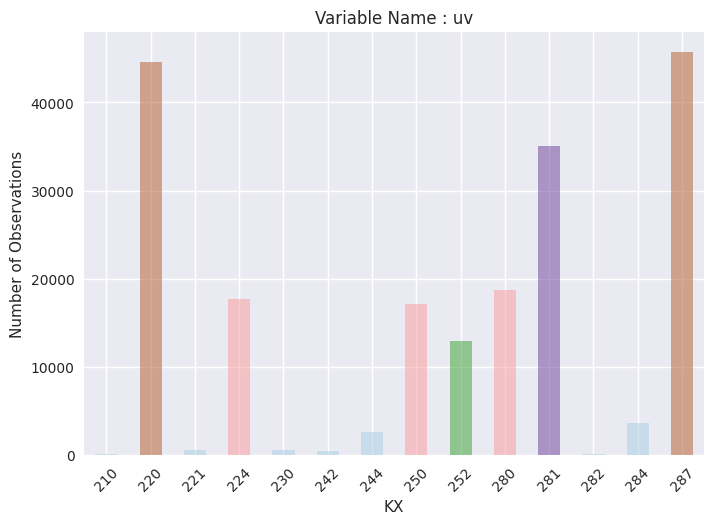

In [27]:
gd.plot_diag.pcount(gdf_list[tidx], varName)

Utilize a função `vcount()` da classe `plot_diag` para obter um histograma com a contagem do número de observações para todos os tipos de variáveis:

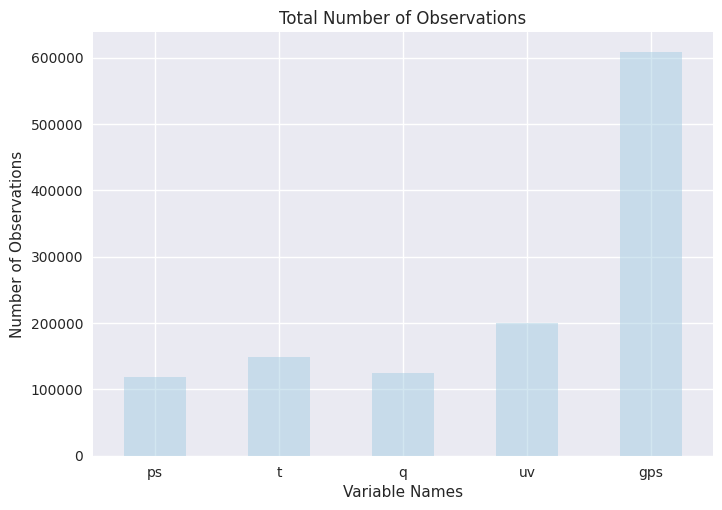

In [28]:
gd.plot_diag.vcount(gdf_list[tidx])

De forma semelhante, utilize a função `kxcount()` da classe `plot_diag` para obter um histograma com a contagem do número de observações por tipo:

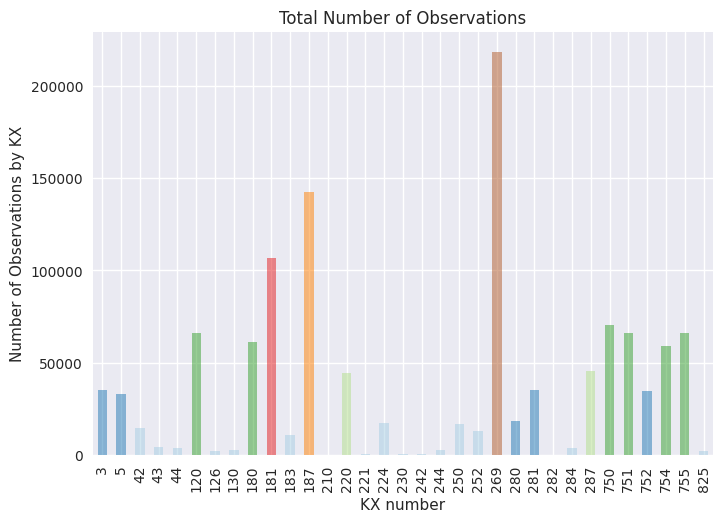

In [29]:
gd.plot_diag.kxcount(gdf_list[tidx])

### Série temporal

<a id='time_series'></a>
A seguir são apresentadas as opções de figuras com a função `time_series()`, incluída na classe `plot_diag`. Inicialmente é gerada uma figura com os parâmetros já fixados nesta seção. Em seguida são apresentadas figuras alterando os parâmetros `Level`, `Lay` e `SingleL`.

Plotando uma série temporal do OmA e OmF:

varName= uv varType= 220 Level= 1000

 Analyzing data of variable: uv  ||  type: 220  ||  Radiossonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-03-26:00  - Level:  1000
 Preparing data for: 2024-03-26:06  - Level:  1000
 Preparing data for: 2024-03-26:12  - Level:  1000
 Preparing data for: 2024-03-26:18  - Level:  1000


 Calculating for 2024-03-26:00
 Calculating for 2024-03-26:06
 Calculating for 2024-03-26:12
 Calculating for 2024-03-26:18


 Making Graphics...
 Done!



<Figure size 600x400 with 0 Axes>

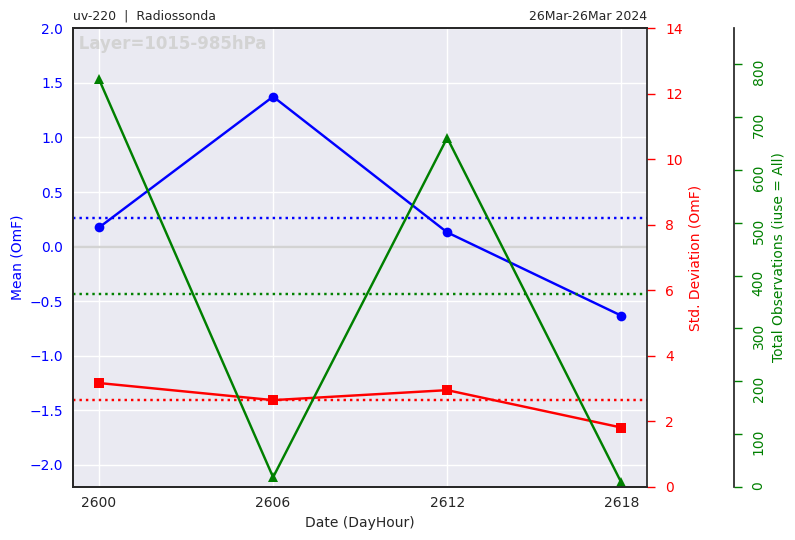

<Figure size 600x400 with 0 Axes>

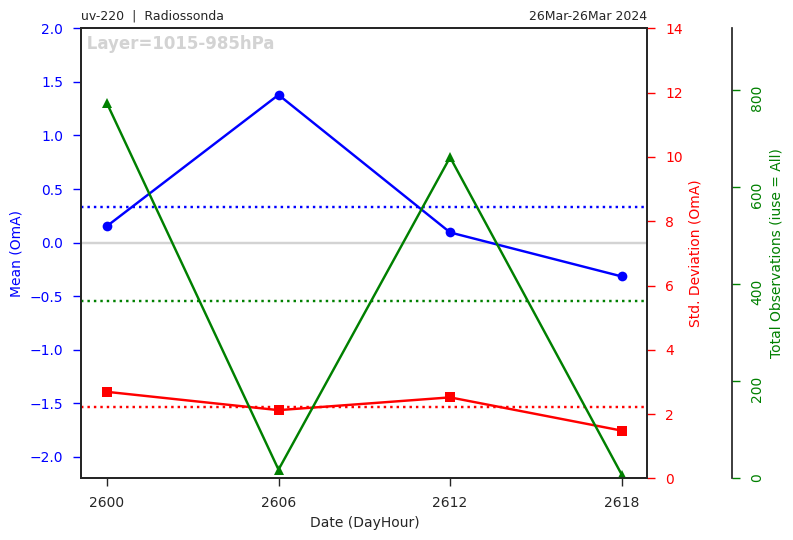

<Figure size 600x400 with 0 Axes>

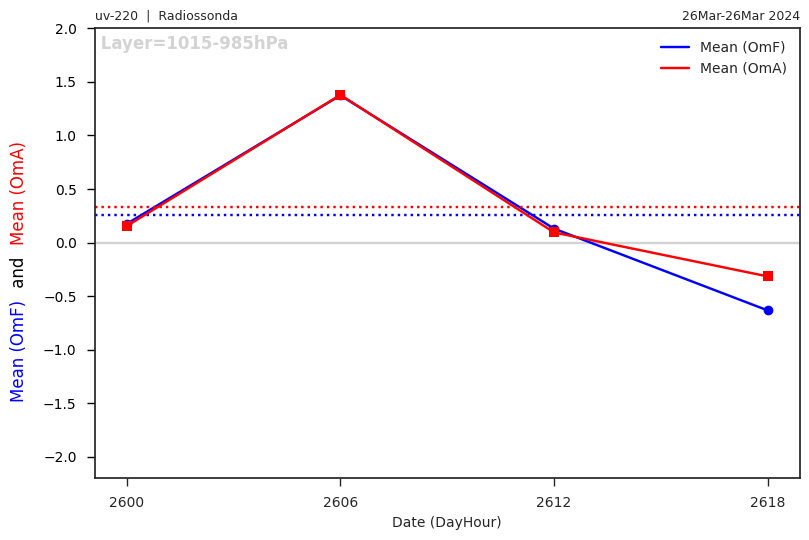

<Figure size 600x400 with 0 Axes>

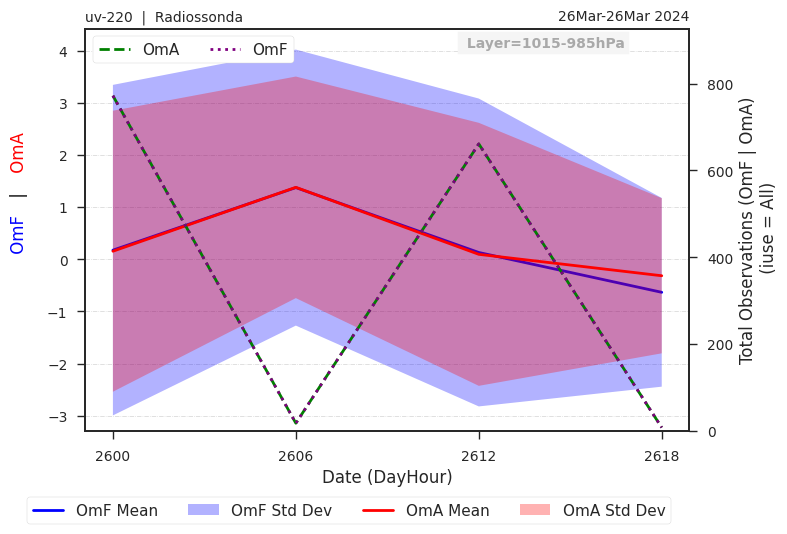

In [30]:
# varName = 'amsua'
# varType = 'n15'
print('varName=',varName,'varType=',varType,'Level=',Level)

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

No caso anterior, o parâmetro `Level` estava fixo em 1000 hPa com `SingleL` igual a `All`, ou seja, toda a atmosfera foi considerada como uma única camada e o valor 1000 hPa funciona apenas como uma flag para indicar que não existe variação em altura. Ainda com `Level=1000`, pode-se usar `SingleL='OneL'` para uma única camada em torno do valor de `Level`, neste caso 1000 hPa, variando entre `Level-Lay` e `Level+Lay` (na definição de variáveis, `Lay` foi fixado com 15 hPa; no caso de ser `None`, o valor padrão de 50 hPa é utilizado).


 Analyzing data of variable: uv  ||  type: 220  ||  Radiossonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-03-26:00  - Level:  1000
 Preparing data for: 2024-03-26:06  - Level:  1000
 Preparing data for: 2024-03-26:12  - Level:  1000
 Preparing data for: 2024-03-26:18  - Level:  1000


 Calculating for 2024-03-26:00
 Calculating for 2024-03-26:06
 Calculating for 2024-03-26:12
 Calculating for 2024-03-26:18


 Making Graphics...
 Done!



<Figure size 600x400 with 0 Axes>

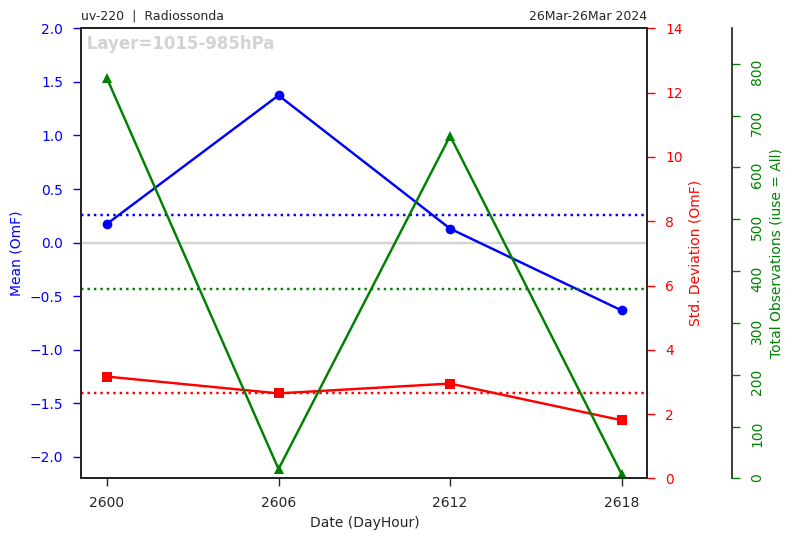

<Figure size 600x400 with 0 Axes>

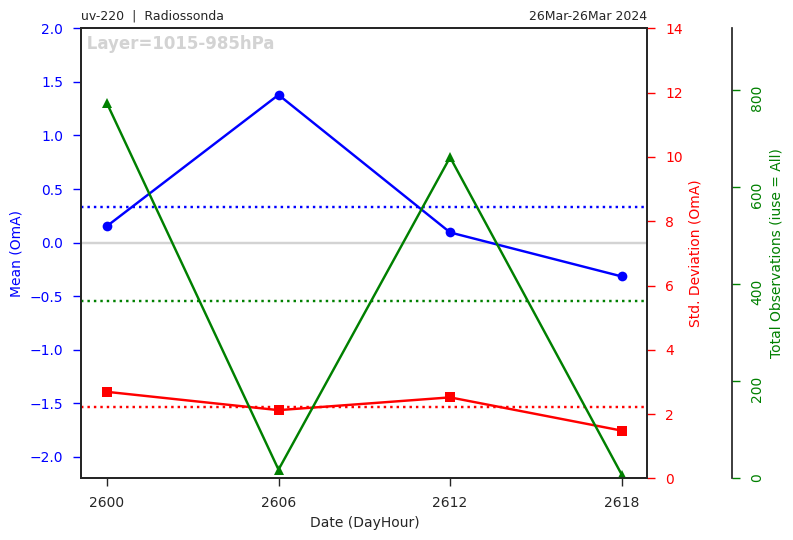

<Figure size 600x400 with 0 Axes>

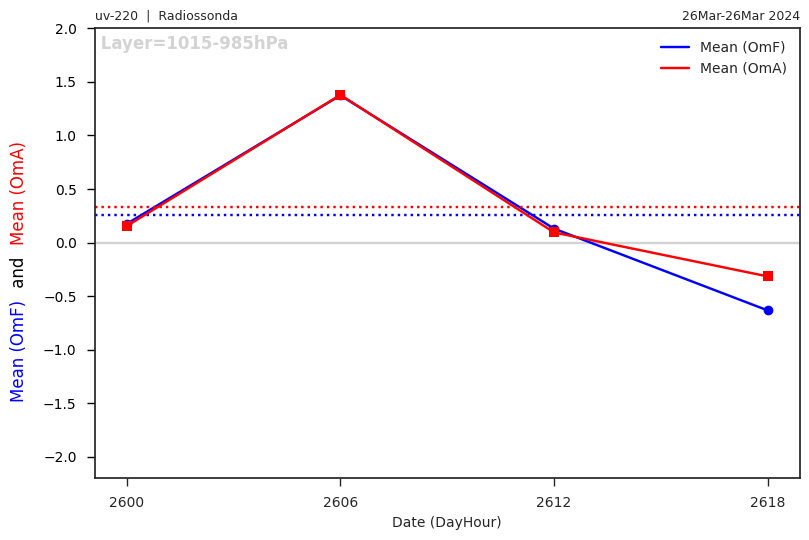

<Figure size 600x400 with 0 Axes>

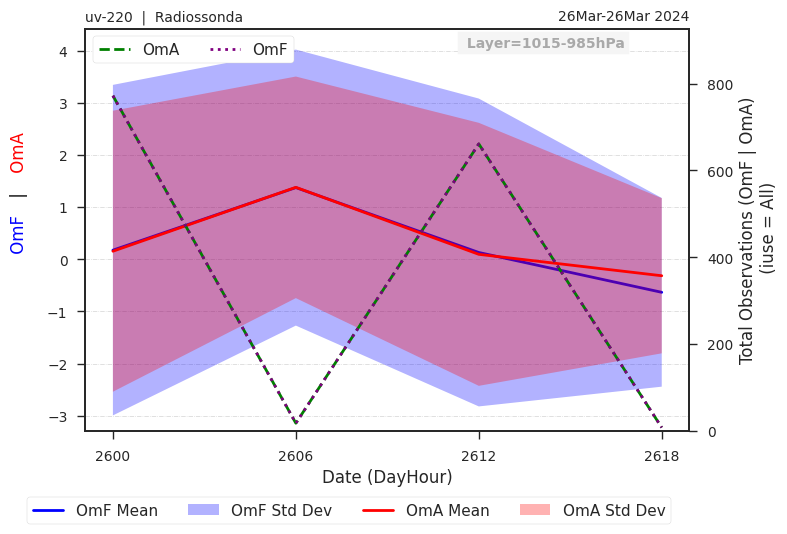

In [31]:
SingleL = 'OneL'
Lay = 15

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Observe como no exemplo acima a quantidade de dados diminui, uma vez que agora está sendo utilizada uma camada entre 1015 e 985 hPa.

Agora vamos alterar para não fixar em um único nível ou camada, ou seja, altear a variável `Level` para `None` ou `Zlevs`. A opção `None` busca os dados em cada nível existente nos arquivos e faz a figura para todos esses níveis, porém os valores no eixo y (ordenada) são apenas dos níveis padrão. É importante esclarecer que os chamados níveis padrão estão definidos na classe `read_diag` e podem ser acessados utilizando o método `zlevs` da seguinte forma:

In [32]:
gdf_list[tidx].zlevs

[1000.0,
 900.0,
 800.0,
 700.0,
 600.0,
 500.0,
 400.0,
 300.0,
 250.0,
 200.0,
 150.0,
 100.0,
 50.0,
 0.0]

Dessa forma, pode-se utilizar o parâmetro `Level='Zlevs'` para produzir uma série temporal por níveis:


 Analyzing data of variable: uv  ||  type: 220  ||  Radiossonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-03-26:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2024-03-26:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2024-03-26:12
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2024-03-26:18
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]



 Calculating for 2024-03-26:00
 Calculating for 2024-03-26:06
 Calculating for 2024-03-26:12
 Calculating for 2024-03-26:18


 Making Graphics...
 Done!



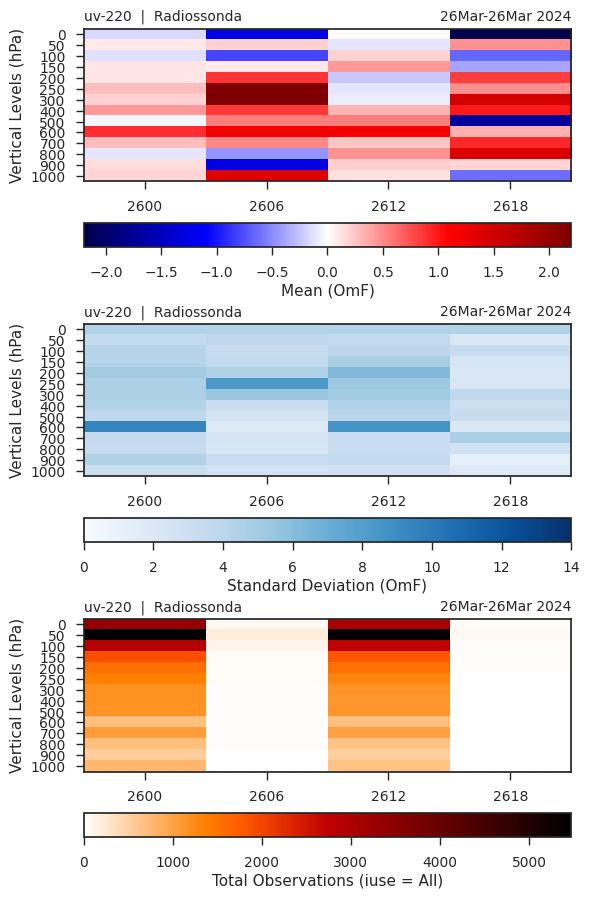

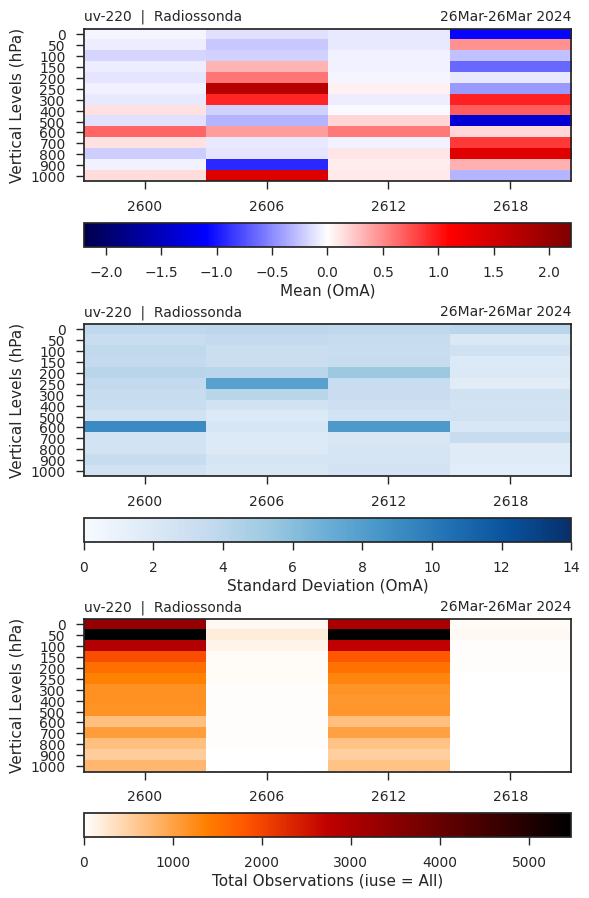

In [33]:
Level = 'Zlevs'
Lay = 15

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Se `Lay=None`, então as camadas são preenchidas variando entre o valor médio considerando as camadas inferiores e superiores. Por exemplo, para o nível de 700 hPa é construída uma camada entre 750 e 650 hPa, uma vez que os níveis inferiores e superiores são 800 e 600 hPa, respectivamente. Para o nível de 1000 hPa a camada varia entre 1050 e 950 hPa.

O mesmo exemplo anterior, mas considerando `Level='Zlevs'`:


 Analyzing data of variable: uv  ||  type: 220  ||  Radiossonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-03-26:00
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2024-03-26:06
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2024-03-26:12
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]

 Preparing data for: 2024-03-26:18
 Levels:  [0, 50, 100, 150, 200, 250, 300, 400, 500, 600, 700, 800, 900, 1000]



 Calculating for 2024-03-26:00
 Calculating for 2024-03-26:06
 Calculating for 2024-03-26:12
 Calculating for 2024-03-26:18


 Making Graphics...
 Done!



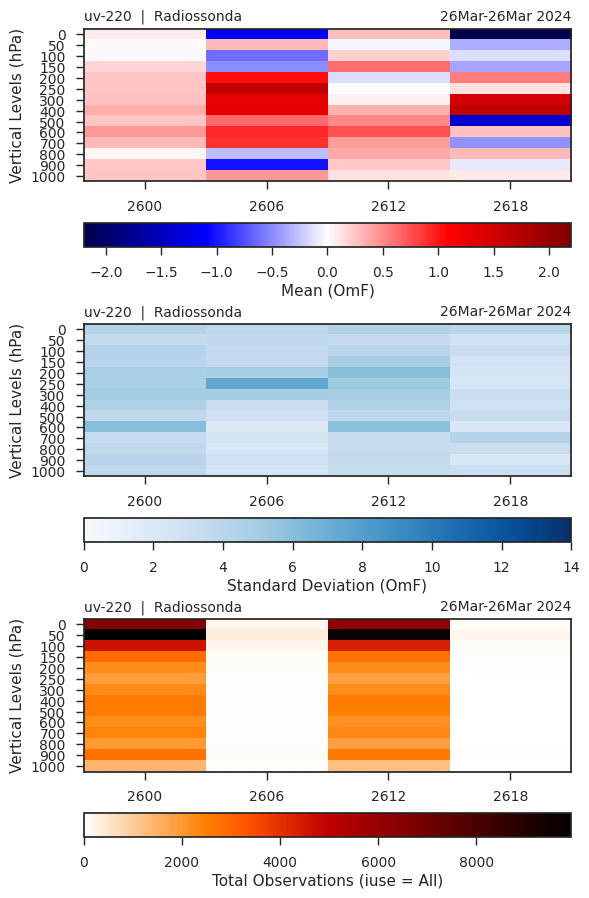

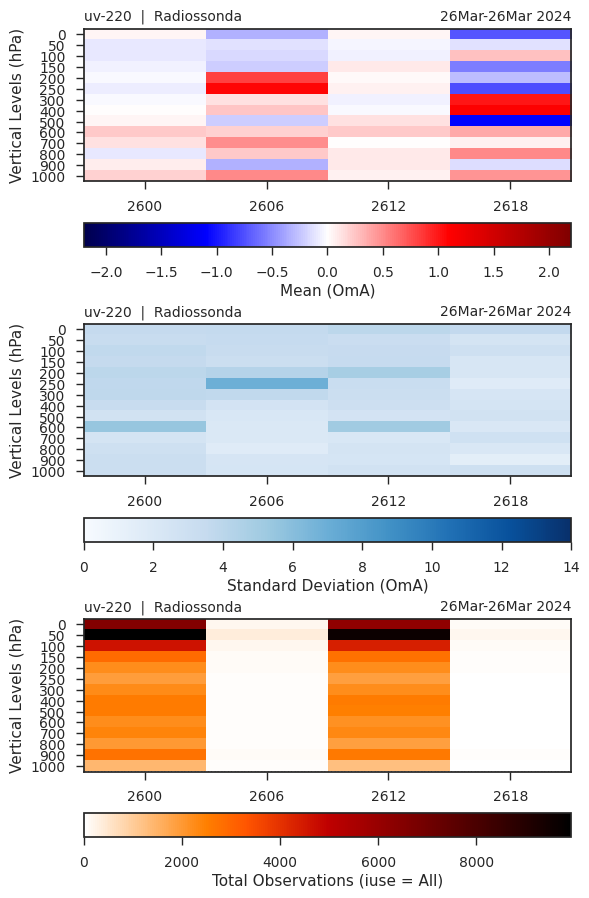

In [34]:
Level = 'Zlevs'
Lay = None

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Finalmente, existe a opção de se considerar todos os níveis, ou seja, `Level=None`. Esta opção traz certa dificuldade na visualização da informação na figura por conta da grande quantidade de níveis e distribuição dos dados em todos os níveis:


 Analyzing data of variable: uv  ||  type: 220  ||  Radiossonda  ||  check: OmF

[1000, 900, 800, 700, 600, 500, 400, 300, 250, 200, 150, 100, 50, 0]
 Preparing data for: 2024-03-26:00
 Levels:  [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,

 Calculating for 2024-03-26:06
 Calculating for 2024-03-26:12
 Calculating for 2024-03-26:18


 Making Graphics...
 Done!



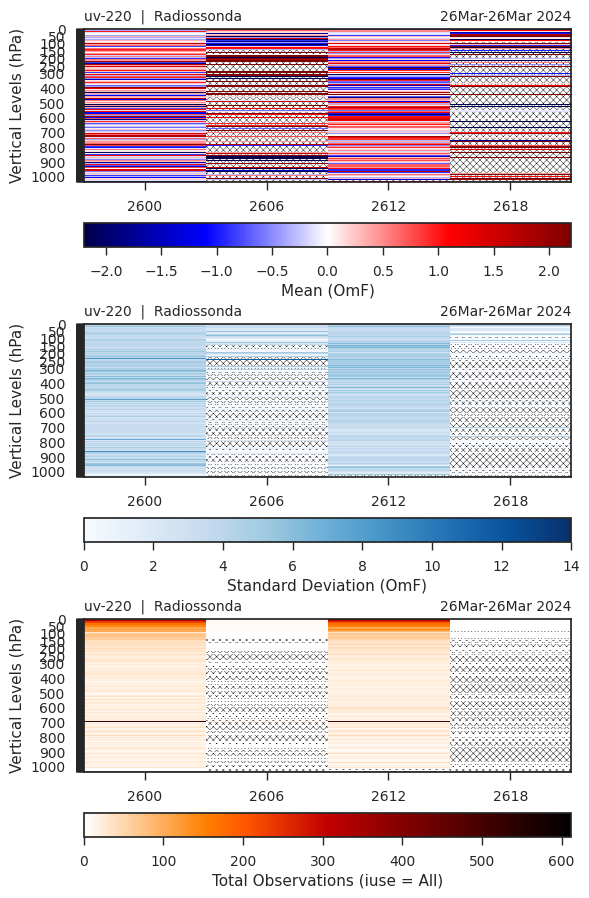

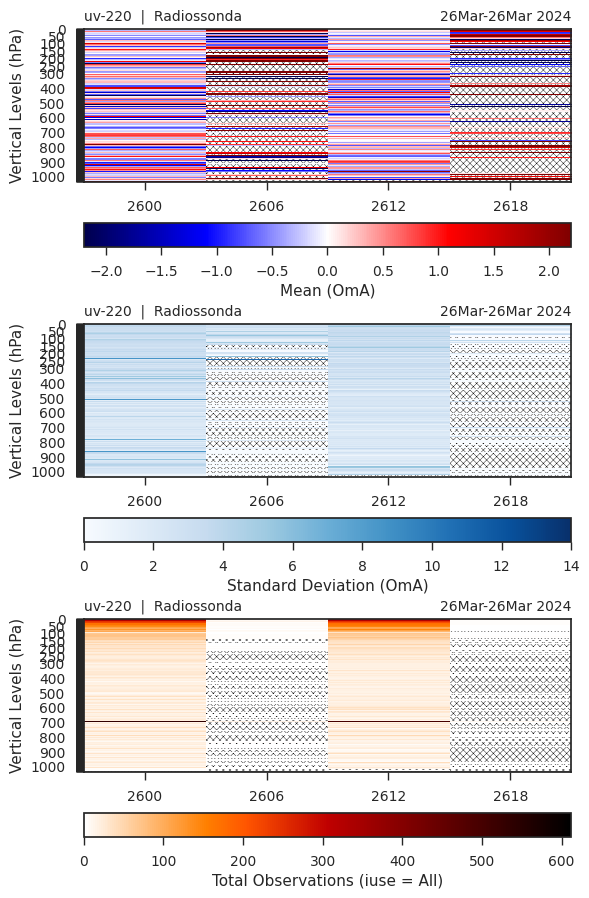

In [35]:
Level = None

gd.plot_diag.time_series(gdf_list,
                         varName=varName, 
                         varType=varType, 
                         dateIni=dateIni, 
                         dateFin=dateFin, 
                         nHour=nHour, 
                         vminOMA=vminOMA, 
                         vmaxOMA=vmaxOMA, 
                         vminSTD=vminSTD, 
                         vmaxSTD=vmaxSTD, 
                         Level=Level, 
                         Lay=Lay, 
                         SingleL=SingleL,
                         Clean=False)

Finalizado o uso dos arquivos, feche-os para liberar a memória utilizada:

In [19]:
for file in gdf_list:
    file.close()

O `readDiag` é um pacote em desenvolvimento e em constante atualização. Novas funcionalidades serão adicionadas e demonstradas por meio deste notebook.